<a href="https://colab.research.google.com/github/Sreeja1585/my-projects/blob/main/K_Nearest_Neighbors_(KNN)_Classification(Task6).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay


In [2]:
iris = datasets.load_iris()
X = iris.data[:, :2]
y = iris.target

df = pd.DataFrame(X, columns=["SepalLength", "SepalWidth"])
df['Target'] = y
X_train, X_test, y_train, y_test = train_test_split(
    df[["SepalLength", "SepalWidth"]], df["Target"], test_size=0.3, random_state=42, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [3]:
k_values = [1, 3, 5, 7, 9]
accuracy_scores = []

print("\nAccuracy for different values of K:")
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    accuracy_scores.append(acc)
    print(f"K = {k} → Accuracy = {acc:.2f}")



Accuracy for different values of K:
K = 1 → Accuracy = 0.71
K = 3 → Accuracy = 0.69
K = 5 → Accuracy = 0.76
K = 7 → Accuracy = 0.71
K = 9 → Accuracy = 0.73


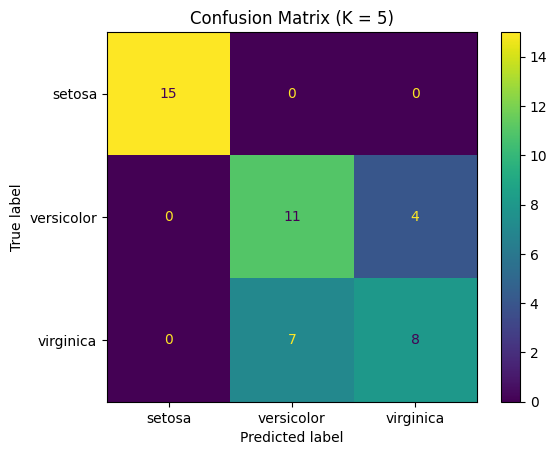

In [5]:
best_k = k_values[accuracy_scores.index(max(accuracy_scores))]
best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_train_scaled, y_train)
y_pred_best = best_knn.predict(X_test_scaled)

cm = confusion_matrix(y_test, y_pred_best)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names)
disp.plot()
plt.title(f"Confusion Matrix (K = {best_k})")
plt.show()


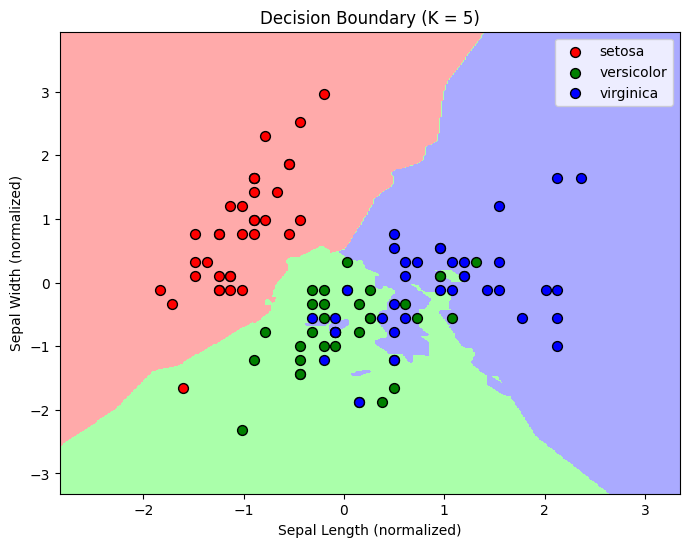

In [7]:
import numpy as np
from matplotlib.colors import ListedColormap
h = .02
x_min, x_max = X_train_scaled[:, 0].min() - 1, X_train_scaled[:, 0].max() + 1
y_min, y_max = X_train_scaled[:, 1].min() - 1, X_train_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = best_knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure(figsize=(8, 6))
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ['red', 'green', 'blue']

plt.contourf(xx, yy, Z, cmap=cmap_light)
for i, color in zip([0, 1, 2], cmap_bold):
    idx = y_train == i
    plt.scatter(X_train_scaled[idx, 0], X_train_scaled[idx, 1], c=color,
                label=iris.target_names[i], edgecolor='k', s=50)

plt.xlabel("Sepal Length (normalized)")
plt.ylabel("Sepal Width (normalized)")
plt.title(f"Decision Boundary (K = {best_k})")
plt.legend()
plt.show()
